In [4]:
onedrive = r"C:\Users\mikek\OneDrive"
# %matplotlib ipympl
# %matplotlib qt
# %matplotlib widget
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

# sys.path.append(r"C:\Users\Mike\OneDrive\Project\sdtools")
sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))
sys.path.append(r'C:\Users\mikek\OneDrive\Project\python-packages')

from gridtools.hypnotoad_tools import *
from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *
from code_comparison.viewer_2d import *
import matplotlib as mpl

%load_ext autoreload
%autoreload 2


print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


In [268]:
case = Load.case_1D(r"C:\Users\mikek\OneDrive\Project\collab\tech\cases\step1d\sta8a-6d_mass_x1.25")

c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\array\core.py:4828: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(


In [7]:
%matplotlib widget

In [56]:
amp.animation?

Type:        module
String form: <module 'animatplot.animation' from 'c:\\Users\\mikek\\anaconda3\\envs\\new\\lib\\site-packages\\animatplot\\animation.py'>
File:        c:\users\mikek\anaconda3\envs\new\lib\site-packages\animatplot\animation.py
Docstring:   <no docstring>

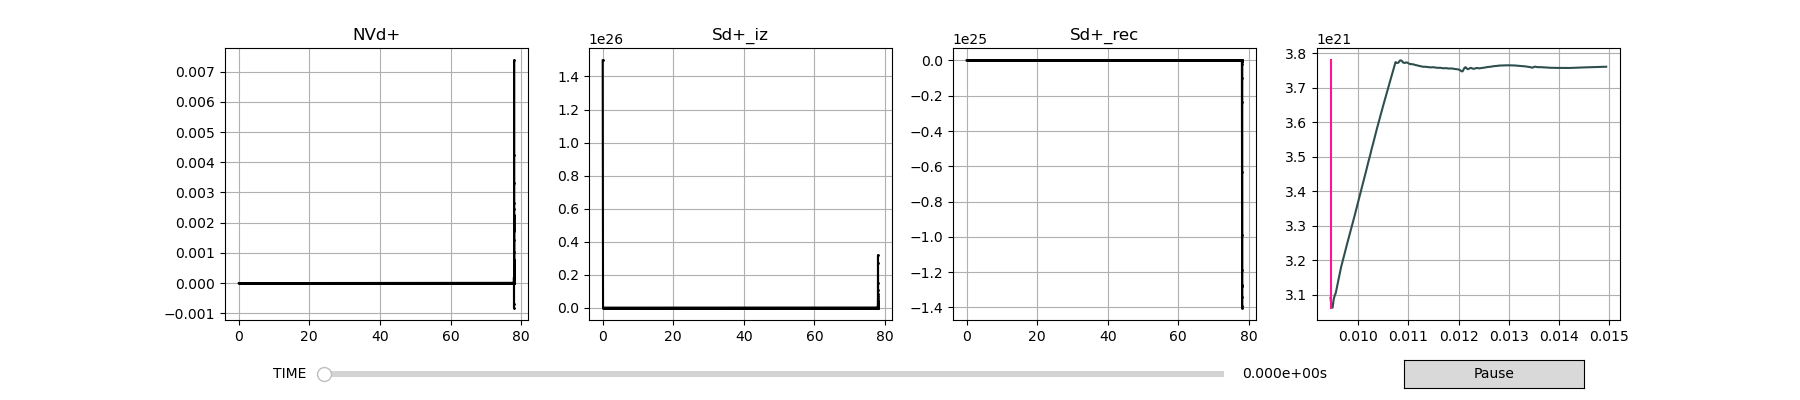

In [285]:
from matplotlib.widgets import RangeSlider, TextBox, Slider
import animatplot as amp

plt.close("all")

dpi = 100

wspace = 0.2
# params = ["NVd+", "Sd+_iz", "Sd+_rec"]
params = ["NVd+", "Sd+_iz", "Sd+_rec"]
# params = ["Sd+_"]
# auxparam = ds["ncalls"]
auxparam = ((ds["Nd+"]+ds["Nd"]) * ds["dv"]).sum("pos")
t = ds.coords["t"].values
num_plots = len(params)



ds = case.ds.isel(pos=slice(1,-1))

fig = plt.figure(dpi=dpi)
fig.set_figheight(4)
fig.set_figwidth(num_plots*6)
fig.subplots_adjust(bottom = 0.2)

# Plot grid
gs0a = mpl.gridspec.GridSpec(
                                ncols=num_plots+1, nrows=1,
                                wspace = wspace
                                )

axes = [None] * num_plots
data = [None] * num_plots
blocks = [None] * num_plots

timeline = amp.Timeline(t, units = "s", fps = 10)


pos = ds["pos"].values

for i, param in enumerate(params):
    data[i] = ds[param].values

# Make scanning line
vline = np.repeat(np.array([[min(auxparam.values), max(auxparam.values)]]), len(t), axis = 0)


for i, param in enumerate(params):
    # All plots after the first one share x and y axes
    if i == 0:
        axes[i] = fig.add_subplot(gs0a[i])
    else:
        axes[i] = fig.add_subplot(gs0a[i], sharex=axes[0])
        
    blocks[i] = amp.blocks.Line(pos, ds[param].values, ax = axes[i], color = "black", marker = "o", markersize = 1)
    # axes[i].set_xlim(77,78.2)
    axes[i].set_title(param)
    axes[i].grid()
    

# Aux plot and vline
axes.append(fig.add_subplot(gs0a[len(params)]))
axes[-1].plot(t, auxparam, c = "darkslategrey")
axes[-1].grid()

# Line is two points, these are the X coordinates for those two points for all times
x = np.tile(t,  (2,1)).transpose()
blocks.append(amp.blocks.Line(x, vline, ax = axes[-1], t_axis=0, color = "deeppink"))

# blocks[-1] = 
    
anim = amp.Animation(blocks, timeline)
anim.controls({"text":"TIME", "color":"darkorange", "valfmt":"%1.3e"})
aux_plot_idx = num_plots
    





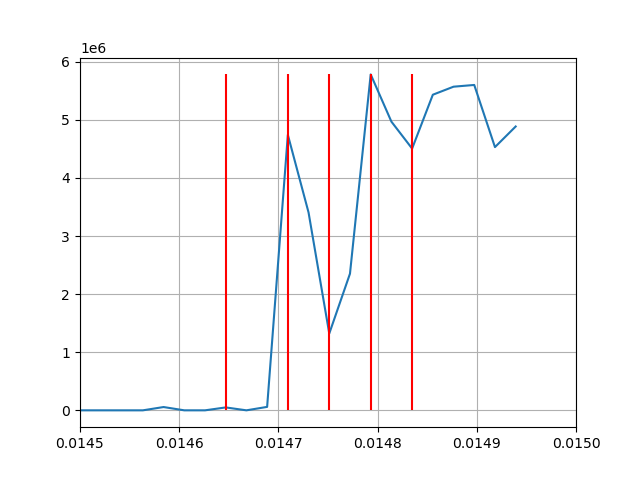

In [260]:
plt.close("all")
fig, ax = plt.subplots()
data = ds["ncalls"].values
tinds = [-15, -12, -10, -8, -6]
ax.plot(t, ds["ncalls"])
ax.vlines([t[x] for x in tinds], min(data), max(data), colors = "red")
ax.set_xlim(0.0145, 0.0150)
ax.grid()


In [276]:
%matplotlib inline

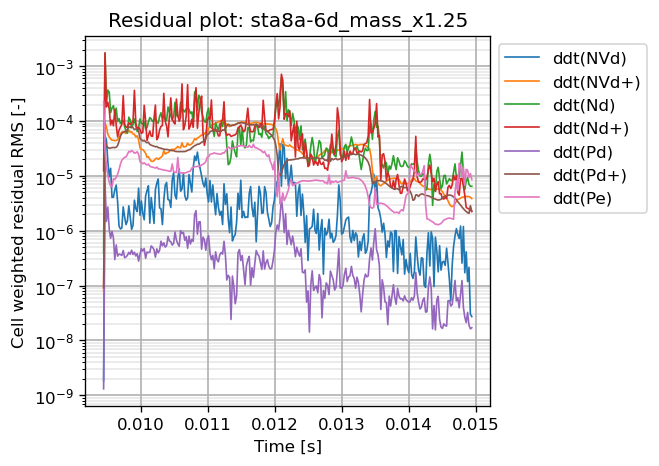

In [278]:
plot_ddt(case)

In [280]:
%matplotlib widget

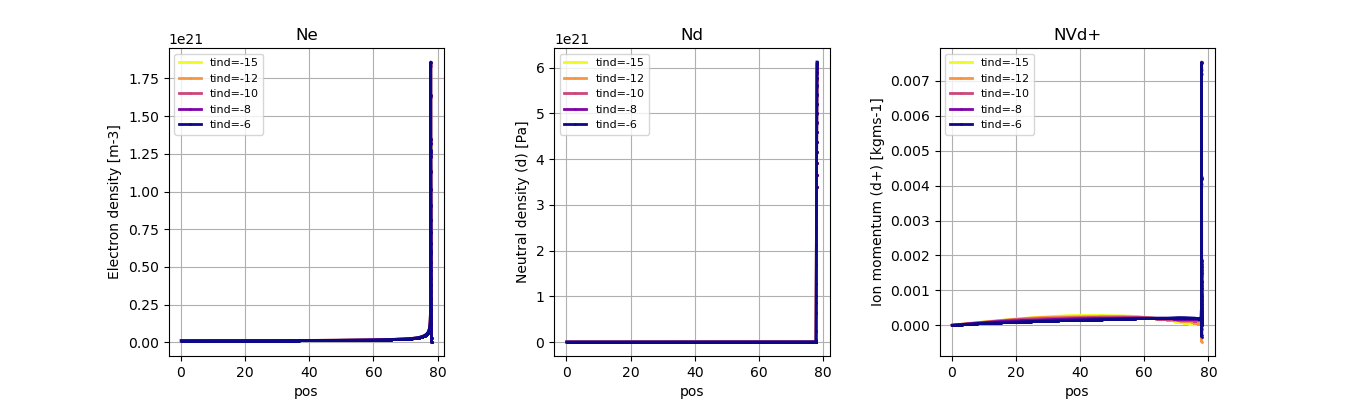

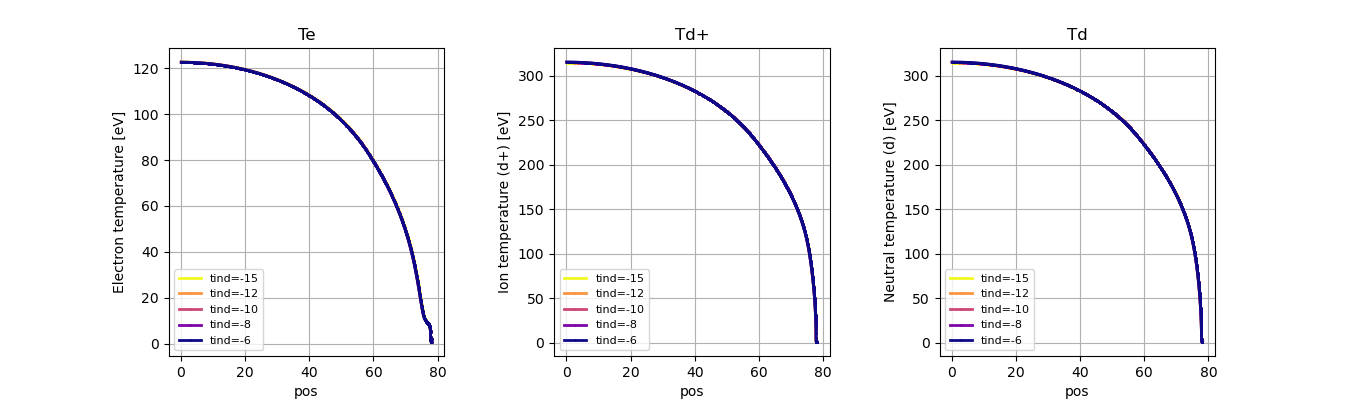

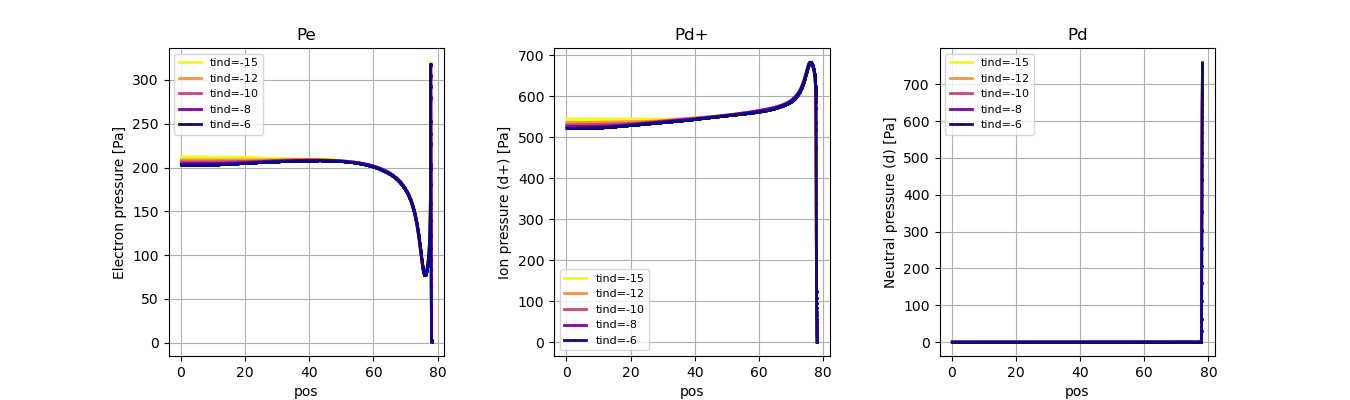

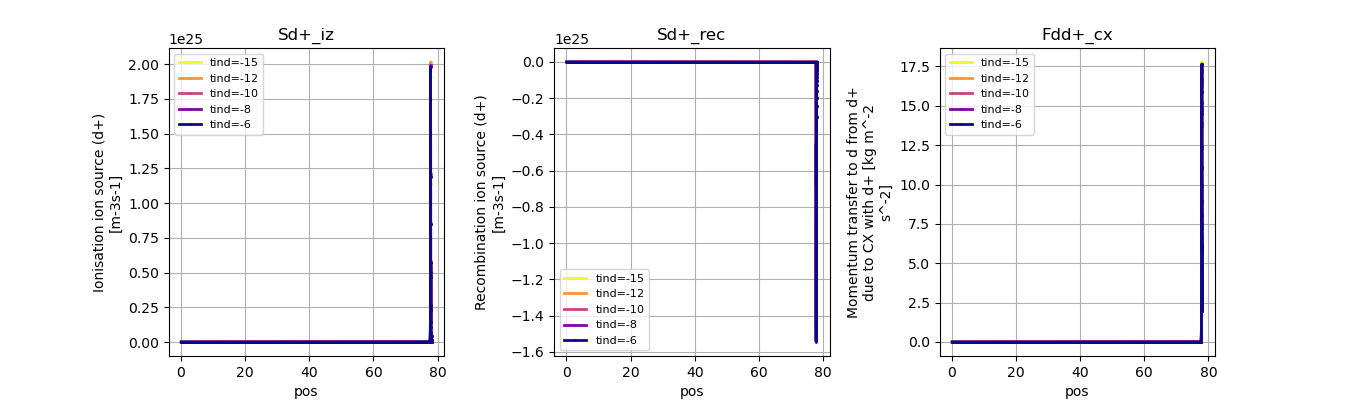

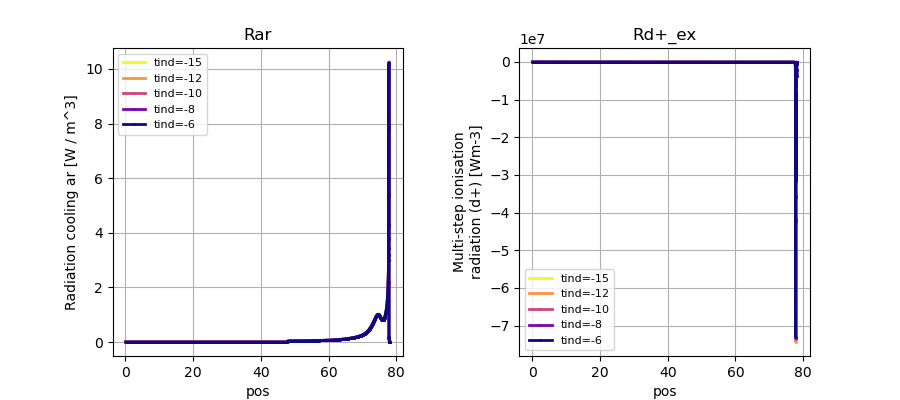

In [286]:
plt.close("all")
ds = case.ds.isel(pos=slice(2,-1))


def plot(list_params):
    fig, axes = plt.subplots(1, len(list_params), figsize=(len(list_params)*4.5, 4), dpi = 100)
    fig.subplots_adjust(wspace = 0.4)
    
    # times = np.arange(-30,0,2)
    # times = [-6, -5, -4, -3, -2, -1]
    times = [-15, -12, -10, -8, -6]
    
    # times = np.linspace(5, len(ds.coords["t"])-1, 10, dtype=int)
    # alphas = np.linspace(0.1,0.8, len(times))
    alphas = [1] * len(times)
    colors = make_cmap("plasma", len(times))[::-1]
    for j, param in enumerate(list_params):
        for i, tind in enumerate(times):
            data = ds[param].isel(t=tind)
            # data = data.sel(pos=slice(77.5,None))
            data.plot(ax = axes[j], x = "pos", marker = "o", label = f"tind={tind}", color = colors[i], ms = 1, lw = 2, alpha = alphas[i])
            
        axes[j].grid()
        axes[j].set_title(param)
        axes[j].legend(fontsize=8)
        # axes[j].set_yscale("symlog")
        
# plot(["Rar", "Sd+_iz", "Ne", "Td+"])
plot(["Ne", "Nd", "NVd+"])
# plot(["NVd+", "NVd"])
# plot(["NVd+", ])
plot(["Te", "Td+", "Td"])
plot(["Pe", "Pd+", "Pd"])
plot(["Sd+_iz", "Sd+_rec", "Fdd+_cx"])
plot(["Rar", "Rd+_ex"])

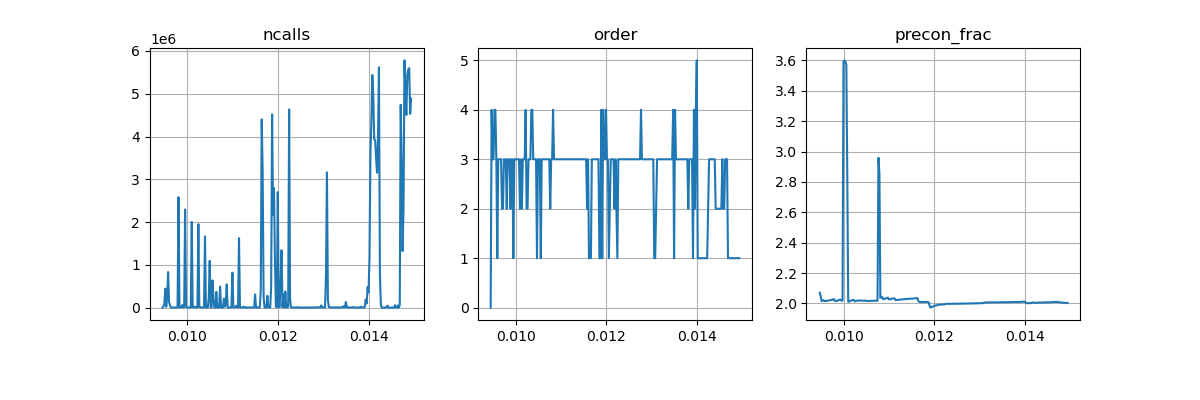

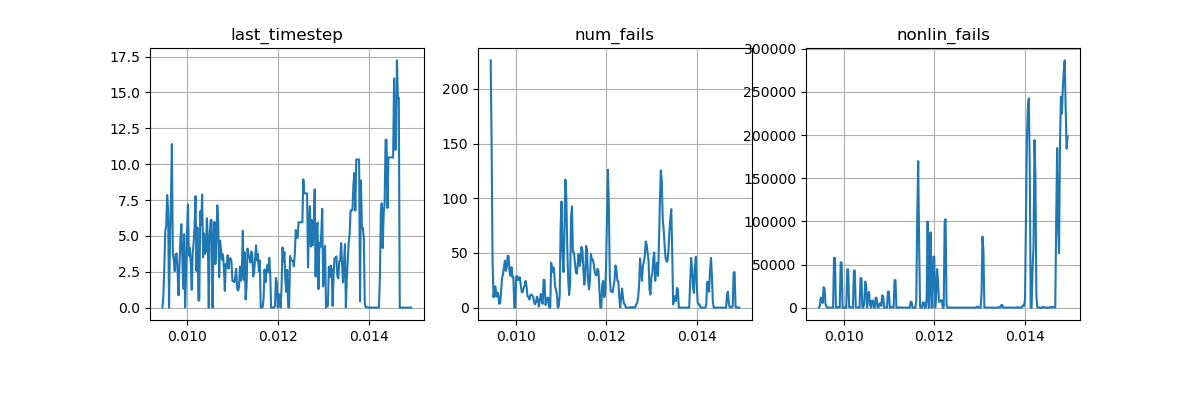

In [238]:






def plot(data):
    num_plots = len(data.keys())

    t = ds.coords["t"]

    fig = plt.figure(dpi=dpi)
    fig.set_figheight(4)
    fig.set_figwidth(num_plots*4)
    fig.subplots_adjust(bottom = 0.2)

    # Plot grid
    gs = mpl.gridspec.GridSpec(
                                    ncols=num_plots, nrows=1,
                                    wspace = wspace
                                    )



    axes = [None] * len(data.keys())


    for i, param in enumerate(data.keys()):
        # All plots after the first one share x and y axes
        if i == 0:
            axes[i] = fig.add_subplot(gs[i])
        else:
            axes[i] = fig.add_subplot(gs[i], sharex=axes[0])
            
        axes[i].plot(t, data[param])
        axes[i].set_title(param)
        axes[i].grid()
        
data = dict()
data["ncalls"] = ds["ncalls"].values
data["order"] = ds["cvode_last_order"].values
data["precon_frac"] = np.divide(ds["cvode_npevals"],(ds["cvode_nfevals"]))
# data["stab_lims"] = ds["cvode_stab_lims"]
plot(data)

data = dict()
data["last_timestep"] = ds["cvode_last_step"]
data["num_fails"] = np.clip(np.gradient(ds["cvode_num_fails"]), 0, None)
data["nonlin_fails"] = np.clip(np.gradient(ds["cvode_nonlin_fails"]), 0, None) #np.gradient(t, ds["cvode_nonlin_fails"])
plot(data)


In [196]:
nrows

2

In [100]:
ds[param].values.shape

(264, 802)

In [101]:
t.shape

(264,)

In [102]:
vline.shape

(264, 2)

0

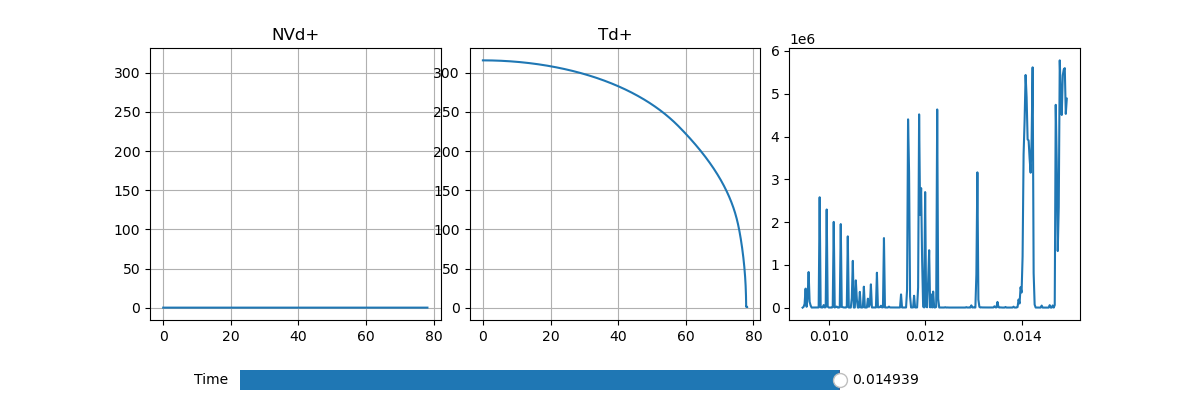

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [52]:
from matplotlib.widgets import RangeSlider, TextBox, Slider
plt.close("all")

dpi = 100
num_plots = 2
wspace = 0.1
params = ["NVd+", "Td+"]
ds = case.ds.isel(pos=slice(1,-1))

fig = plt.figure(dpi=dpi)
fig.set_figheight(4)
fig.set_figwidth(num_plots*6)
fig.subplots_adjust(bottom = 0.2)

# Plot grid
gs0a = mpl.gridspec.GridSpec(
                                ncols=num_plots+1, nrows=1,
                                wspace = wspace
                                )

axes = [None] * num_plots
data = [None] * num_plots

time = ds["t"].values
pos = ds["pos"].values

for i, param in enumerate(params):
    data[i] = ds[param].values

for i, param in enumerate(params):
    # All plots after the first one share x and y axes
    if i == 0:
        axes[i] = fig.add_subplot(gs0a[i])
    else:
        axes[i] = fig.add_subplot(gs0a[i], sharex=axes[0], sharey=axes[0])
    
    axes[i].plot(pos, data[i][-1,:])
    # ds[param].isel(t=-1).plot(ax = axes[i])
    axes[i].set_title(param)
    axes[i].grid()
    
aux_plot_idx = num_plots
    
axes.append(fig.add_subplot(gs0a[aux_plot_idx]))
axes[-1].plot(ds.coords["t"], ds["ncalls"])

tmin = ds.coords["t"][0]
tmax = ds.coords["t"][-1]
slider = Slider(
                ax = fig.add_axes([0.2, 0, 0.5, 0.1]), 
                label = "Time",   # left, bottom, width, height
                valmin = tmin,
                valmax = tmax,
                orientation = "horizontal",
                valinit = (tmax)
                )

def update(val):
    slider.ax.set_ylim(tmin, tmax) # This is inexplicably needed otherwise it freezes
    tind = min(ds["t"], key=lambda x:abs(x-val)) # Find nearest time
    
    for i, param in enumerate(params):
        axes[i].plot(pos, data[i][tind,:])
        
        fig.canvas.draw_idle()
        fig.canvas.flush_events() # https://stackoverflow.com/questions/64789437/what-is-the-difference-between-figure-show-figure-canvas-draw-and-figure-canva
        
slider.on_changed(update)


In [48]:
xbout.plotting.animate.animate_line?

Signature:
xbout.plotting.animate.animate_line(
    data,
    animate_over=None,
    animate=True,
    axis_coords=None,
    vmin=None,
    vmax=None,
    logscale=False,
    fps=10,
    save_as=None,
    sep_pos=None,
    ax=None,
    aspect=None,
    controls='both',
    **kwargs,
)
Docstring:
Plots a line plot which is animated with time.

Currently only supports 1D+1 data, which it plots with animatplot's Line animation.

Parameters
----------
data : xarray.DataArray
animate_over : str, optional
    Dimension over which to animate, defaults to the time dimension
animate : bool, optional
    If set to false, do not create the animation, just return the block
axis_coords : None, str, dict
    Coordinates to use for axis labelling.
    - None: Use the dimension coordinate for each axis, if it exists.
    - "index": Use the integer index values.
    - dict: keys are dimension names, values set axis_coords for each axis
      separately. Values can be: None, "index", the name of a 1d va